import libaries

In [ ]:
# Import libraries
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Visit https://ipython.readthedocs.io/en/stable/interactive/plotting.html for information on %matplotlib
 
import seaborn as sns
 
# Hide warnings if you are presenting your project to an audience to make your code look cleaner
import warnings
warnings.filterwarnings("ignore")
# Visit https://docs.python.org/3/library/warnings.html for information on warning control# Import libraries
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Visit https://ipython.readthedocs.io/en/stable/interactive/plotting.html for information on %matplotlib
 
import seaborn as sns
 
# Hide warnings if you are presenting your project to an audience to make your code look cleaner
import warnings
warnings.filterwarnings("ignore")
# Visit https://docs.python.org/3/library/warnings.html for information on warning control

In [ ]:
data=pd.read_csv('/content/health care diabetes.csv')

# **WEEK 1**

In [ ]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome is binary so classification or logistic regression can be used

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Need Standardization

no missing value

**Descriptive Analysis and visulaziation **

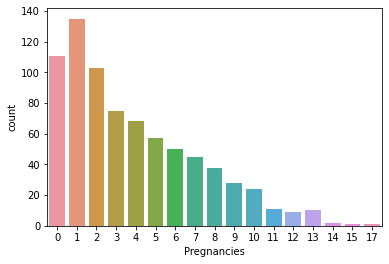

In [ ]:
sns.countplot(data.Pregnancies)

**This can be treated as catagorical**

Pregancies from 0 to 17

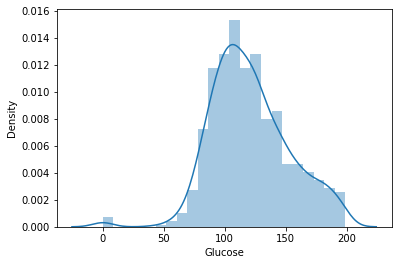

In [ ]:
sns.distplot(data.Glucose)

Clearly anything less than 50 is missing value  USe median

From research we found out 140 is normal 
normal < 100
preddeb 100-125
deb >125

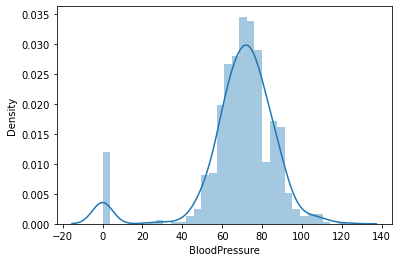

In [ ]:
sns.distplot(data.BloodPressure)



```
# This is formatted as code
```

Blood pressure <40 is missing value 



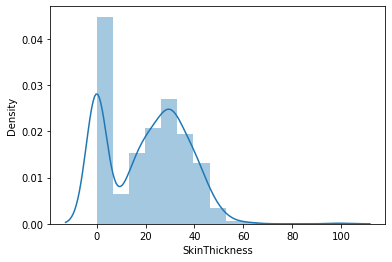

In [ ]:
sns.distplot(data.SkinThickness)

Skin Thickness zero not possible replace with mode 

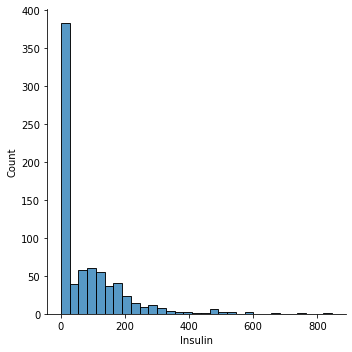

In [ ]:
sns.displot(data.Insulin)

Insulin lvl will be replaced by median to don' disturb distribution 

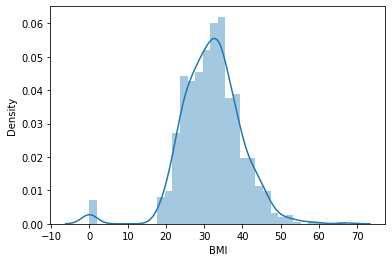

In [ ]:
sns.distplot(data.BMI)

Bmi with median

**Treating Missing Value**

In [ ]:

#!pip install feature-engine

In [ ]:
#data.columns

In [ ]:
feauture_col=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
treated_data=data[feauture_col]

In [ ]:
treated_data['Gluc']

In [ ]:
from feature_engine.imputation import MeanMedianImputer
num_imputer=MeanMedianImputer()
num_imputer.fit_transform(treated_data)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [ ]:
treated_data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [ ]:
df=data[['Pregnancies','DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [ ]:
new_data=pd.concat([df,treated_data],axis=1)

In [ ]:
new_data.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,6,0.627,50,1,148,72,35,0,33.6
1,1,0.351,31,0,85,66,29,0,26.6
2,8,0.672,32,1,183,64,0,0,23.3
3,1,0.167,21,0,89,66,23,94,28.1
4,0,2.288,33,1,137,40,35,168,43.1


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   DiabetesPedigreeFunction  768 non-null    float64
 2   Age                       768 non-null    int64  
 3   Outcome                   768 non-null    int64  
 4   Glucose                   768 non-null    int64  
 5   BloodPressure             768 non-null    int64  
 6   SkinThickness             768 non-null    int64  
 7   Insulin                   768 non-null    int64  
 8   BMI                       768 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 ****

# **Week 2**


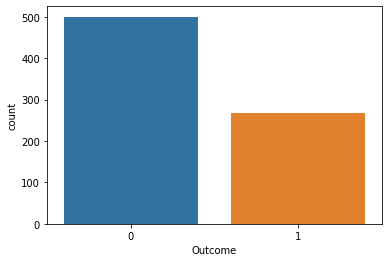

In [ ]:
#balance
sns.countplot(new_data.Outcome)

In [ ]:
new_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Dataset is in ratio 2:1 and can be treted as balanced 

In [ ]:
#Scatter Plot

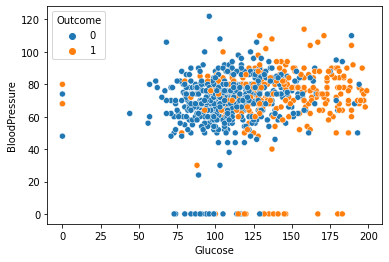

In [ ]:
sns.scatterplot(x=new_data.Glucose, y=new_data.BloodPressure, hue=data.Outcome)

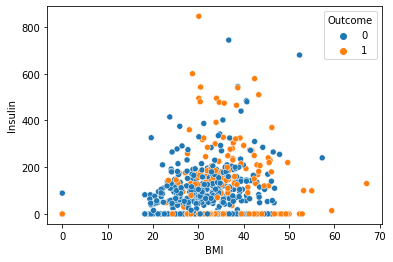

In [ ]:
sns.scatterplot(x=new_data.BMI, y=new_data.Insulin, hue=new_data.Outcome)

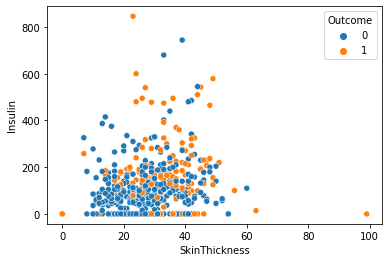

In [ ]:
sns.scatterplot(x=new_data.SkinThickness, y=new_data.Insulin, hue=new_data.Outcome)

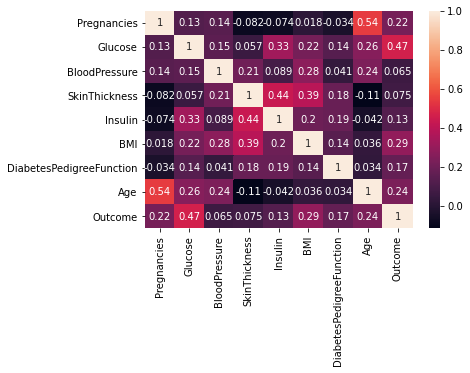

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
#After alot of thinking I have chosen to to use smart correlation from feature engine to remove correlated features


Outcome is good coorelated with Glucose

Age and preg are highly correlated

Insulin and skin_thickness is correlated

Bmi and skin_thickness is good_correlated




# **Week 3**

In [ ]:
new_data.columns

Index(['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose',
       'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],
      dtype='object')

In [ ]:
feauture_col=['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Glucose',
       'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Before going further let's split data to validate our result 

In [ ]:
from sklearn.model_selection import train_test_split

X = new_data[feauture_col]
y = new_data['Outcome']

# For the larger the dataset, the smaller the test 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

**Stanadrdization**

In [ ]:
from sklearn.preprocessing import RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper
scaler = SklearnTransformerWrapper(transformer = RobustScaler())

scaler.fit_transform(X_train)
scaler.transform(X_val)

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI
668,0.6,0.131579,0.8750,-0.463415,-0.777778,0.31250,1.173745,0.215054
324,-0.2,-0.610526,-0.5000,-0.121951,0.166667,0.28125,-0.293436,0.397849
624,-0.2,-0.584211,-0.5000,-0.219512,-0.444444,-0.71875,-0.293436,-0.129032
690,1.0,1.252632,0.3125,-0.243902,0.444444,-0.71875,-0.293436,-0.795699
473,0.8,-0.447368,1.3125,0.463415,1.000000,-0.71875,-0.293436,-0.225806
...,...,...,...,...,...,...,...,...
512,1.2,-0.473684,1.8125,-0.634146,-0.222222,-0.71875,-0.293436,-0.838710
109,-0.6,-0.350000,-0.3125,-0.536585,0.722222,0.06250,-0.015444,0.580645
587,0.6,-0.344737,0.0000,-0.341463,-0.333333,-0.71875,-0.293436,-0.827957
362,0.4,-0.197368,2.2500,-0.341463,2.000000,0.43750,-0.293436,0.774194


In [ ]:
X_train.columns

Index(['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Glucose',
       'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],
      dtype='object')

under smapling our majority class to increase precicision of calculating **minority as thats more imp**
I have choosen RandomUnderSample  for this 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)


# **Week 4**

# Data modeling

In [ ]:
#importing comparision
from sklearn.metrics import classification_report

In [ ]:

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_under,y_train_under)

LogisticRegression()

In [ ]:
print(model_lr.score(X_train,y_train))
print(model_lr.score(X_val,y_val))

0.7612156295224313
0.6623376623376623


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,model_lr.predict(X))
cm

array([[377, 123],
       [ 68, 200]])

**Our main objective was to predict more ways a person can get diabetic and we could predict 198 out of 268 **

AUC: 0.837


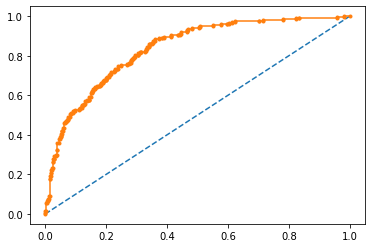

In [ ]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model_lr.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [ ]:
y_pred=model_lr.predict(X_val)

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.62      0.70        50
           1       0.51      0.74      0.61        27

    accuracy                           0.66        77
   macro avg       0.66      0.68      0.66        77
weighted avg       0.71      0.66      0.67        77



In [ ]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train_under,y_train_under)

DecisionTreeClassifier()

In [ ]:
y_pred=model_dt.predict(X_val)

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74        50
           1       0.55      0.67      0.60        27

    accuracy                           0.69        77
   macro avg       0.67      0.68      0.67        77
weighted avg       0.71      0.69      0.69        77



In [ ]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model2.fit(X_train_under,y_train_under)

KNeighborsClassifier(n_neighbors=7)

AUC: 0.842
True Positive Rate - [0.         0.20149254 0.40298507 0.6641791  0.80223881 0.91044776
 0.97014925 0.99626866 1.        ], False Positive Rate - [0.    0.018 0.056 0.156 0.288 0.414 0.606 0.822 1.   ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

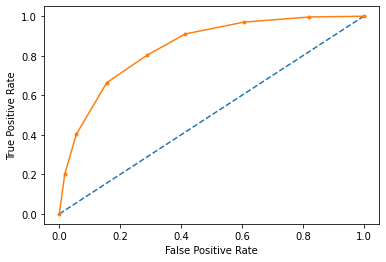

In [ ]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model2.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
type(X_train_under)


pandas.core.frame.DataFrame

In [ ]:
X_train_under=pd.DataFrame(X_train_under,columns=['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Glucose',
       'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

In [ ]:
y_train_under=pd.DataFrame(y_train_under,columns=["Outcome"])

In [ ]:
X_train_under.head(

)

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,0,0.600,25,97,64,36,100,36.8
1,1,0.416,26,71,62,0,0,21.8
2,2,0.525,22,91,62,0,0,27.3
3,3,0.154,24,99,54,19,86,25.6
4,1,0.655,24,193,50,16,375,25.9


In [ ]:
train_data=pd.concat([X_train_under,y_train_under],axis=1)

In [ ]:
train_data.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,0,0.600,25,97,64,36,100,36.8,0
1,1,0.416,26,71,62,0,0,21.8,0
2,2,0.525,22,91,62,0,0,27.3,0
3,3,0.154,24,99,54,19,86,25.6,0
4,1,0.655,24,193,50,16,375,25.9,0


To compare multiple classification algos I am using pycaret

In [ ]:
!#!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(data, target = "Outcome",
            silent = True, session_id = 786)

,Description,Value
0,session_id,786
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7579,0.8181,0.5655,0.6978,0.6222,0.4478,0.4548,0.526
lda,Linear Discriminant Analysis,0.7543,0.8148,0.5550,0.6948,0.6147,0.4383,0.4458,0.017
rf,Random Forest Classifier,0.7525,0.8175,0.5700,0.6800,0.6172,0.4376,0.4429,0.508
ridge,Ridge Classifier,0.7506,0.0000,0.5392,0.6948,0.6051,0.4275,0.4362,0.014
gbc,Gradient Boosting Classifier,0.7432,0.8207,0.5918,0.6707,0.6225,0.4298,0.4369,0.128
lightgbm,Light Gradient Boosting Machine,0.7394,0.8253,0.6074,0.6506,0.6245,0.4259,0.4295,0.098
et,Extra Trees Classifier,0.7377,0.7941,0.5187,0.6870,0.5845,0.3986,0.4119,0.469
ada,Ada Boost Classifier,0.7338,0.7888,0.5863,0.6406,0.6087,0.4083,0.4120,0.115
dt,Decision Tree Classifier,0.7097,0.6858,0.6024,0.6002,0.5982,0.3722,0.3744,0.015
knn,K Neighbors Classifier,0.7042,0.7546,0.5653,0.5983,0.5740,0.3499,0.3550,0.120


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Best model is:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
final_model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
final_model.fit(X_train_under,y_train_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
cm = confusion_matrix(y,model_lr.predict(X))
cm

array([[377, 123],
       [ 68, 200]])

# Data reporting

We could predict 199 diabetic patients

In [ ]:
data.to_excel('health_care_diabetes.xlsx')


In [ ]:
from IPython.display import Image
Image("/content/Tableau dashbord.PNG")